In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import collections
from collections import Counter  # Menghitung obyek

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import session_info
from sklearn import tree
import pickle


In [2]:
session_info.show()

## Data Understanding


In [3]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")


In [4]:

df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.shape


(2111, 17)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
df.isna().sum()


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [8]:
df.columns


Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [9]:
df.columns = ['Gender', 'Age', 'Height', 'Weight',
              'Family History with Overweight',
              'Frequent consumption of high caloric food',
              'Frequency of consumption of vegetables',
              'Number of main meals', 'Consumption of food between meals',
              'Smoke', 'Consumption of water daily',
              'Calories consumption monitoring',
              'Physical activity frequency', 'Time using technology devices',
              'Consumption of alcohol', 'Transportation used', 'Obesity']

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     2111 non-null   object 
 1   Age                                        2111 non-null   float64
 2   Height                                     2111 non-null   float64
 3   Weight                                     2111 non-null   float64
 4   Family History with Overweight             2111 non-null   object 
 5   Frequent consumption of high caloric food  2111 non-null   object 
 6   Frequency of consumption of vegetables     2111 non-null   float64
 7   Number of main meals                       2111 non-null   float64
 8   Consumption of food between meals          2111 non-null   object 
 9   Smoke                                      2111 non-null   object 
 10  Consumption of water dai

### Benerin isi dataset


In [10]:
df['Age'] = df['Age'].round(1)
df['Height'] = df['Height']*100
df['Height'] = df['Height'].round(1)
df['Weight'] = df['Weight'].round(1)
df['Transportation used'] = df['Transportation used'].apply(
    lambda x: x.replace('_', ' '))
df['Obesity'] = df['Obesity'].apply(lambda x: x.replace('_', ' '))


In [11]:
df['Consumption of alcohol'].value_counts()


Sometimes     1401
no             639
Frequently      70
Always           1
Name: Consumption of alcohol, dtype: int64

In [12]:
df['Obesity'].value_counts()


Obesity Type I         351
Obesity Type III       324
Obesity Type II        297
Overweight Level I     290
Overweight Level II    290
Normal Weight          287
Insufficient Weight    272
Name: Obesity, dtype: int64

In [13]:
# Ngubah value beberapa column

for columns in ['Frequency of consumption of vegetables',
                'Number of main meals', 'Consumption of water daily',
                'Physical activity frequency', 'Time using technology devices']:
    df[columns] = df[columns].apply(round)
    value = np.array(df[columns])
    print(columns, ':', 'min:', np.min(value),
          'max:', np.max(value), df[columns].dtype)
    print(df[columns].unique())


Frequency of consumption of vegetables : min: 1 max: 3 int64
[2 3 1]
Number of main meals : min: 1 max: 4 int64
[3 1 4 2]
Consumption of water daily : min: 1 max: 3 int64
[2 3 1]
Physical activity frequency : min: 0 max: 3 int64
[0 3 2 1]
Time using technology devices : min: 0 max: 2 int64
[1 0 2]


In [14]:
df


,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,171.1,131.4,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public Transportation,Obesity Type III
2107,Female,22.0,174.9,133.7,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.5,175.2,133.7,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.4,173.9,133.3,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public Transportation,Obesity Type III


In [15]:
# df untuk EDA, df1 nanti untuk modelling
df1 = df.copy()
df1


,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,171.1,131.4,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public Transportation,Obesity Type III
2107,Female,22.0,174.9,133.7,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.5,175.2,133.7,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.4,173.9,133.3,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public Transportation,Obesity Type III


In [16]:
for columns in ['Frequency of consumption of vegetables',
                'Number of main meals', 'Consumption of water daily',
                'Physical activity frequency', 'Time using technology devices']:
    print(columns, df1[columns].unique())


Frequency of consumption of vegetables [2 3 1]
Number of main meals [3 1 4 2]
Consumption of water daily [2 3 1]
Physical activity frequency [0 3 2 1]
Time using technology devices [1 0 2]


## Exploratory Data Analysis


In [17]:
mappingConsumptionVegetables = {1: 'Never', 2: 'Sometimes', 3: 'Always'}
mappingMainMeals = {1: '1', 2: '2', 3: '3', 4: '3+'}
mappingConsumptionWater = {1: 'Less than a liter',
                           2: 'Between 1 and 2 L', 3: 'More than 2 L'}
mappingPhysicalFreq = {0: 'I do not have',
                       1: '1 or 2 days', 2: '2 or 4 days', 3: '4 or 5 days'}
mappignUsingTechDevices = {0: '0-2 hours',
                           1: '3-5 hours', 2: 'More than 5 hours'}


In [18]:
df['Frequency of consumption of vegetables'] = df['Frequency of consumption of vegetables'].replace(
    mappingConsumptionVegetables)
df['Number of main meals'] = df['Number of main meals'].replace(
    mappingMainMeals)
df['Consumption of water daily'] = df['Consumption of water daily'].replace(
    mappingConsumptionWater)
df['Physical activity frequency'] = df['Physical activity frequency'].replace(
    mappingPhysicalFreq)
df['Time using technology devices'] = df['Time using technology devices'].replace(
    mappignUsingTechDevices)


In [19]:
df


,Gender,Age,Height,Weight,Family History with Overweight,Frequent consumption of high caloric food,Frequency of consumption of vegetables,Number of main meals,Consumption of food between meals,Smoke,Consumption of water daily,Calories consumption monitoring,Physical activity frequency,Time using technology devices,Consumption of alcohol,Transportation used,Obesity
0,Female,21.0,162.0,64.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 L,no,I do not have,3-5 hours,no,Public Transportation,Normal Weight
1,Female,21.0,152.0,56.0,yes,no,Always,3,Sometimes,yes,More than 2 L,yes,4 or 5 days,0-2 hours,Sometimes,Public Transportation,Normal Weight
2,Male,23.0,180.0,77.0,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3-5 hours,Frequently,Public Transportation,Normal Weight
3,Male,27.0,180.0,87.0,no,no,Always,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0-2 hours,Frequently,Walking,Overweight Level I
4,Male,22.0,178.0,89.8,no,no,Sometimes,1,Sometimes,no,Between 1 and 2 L,no,I do not have,0-2 hours,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21.0,171.1,131.4,yes,yes,Always,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3-5 hours,Sometimes,Public Transportation,Obesity Type III
2107,Female,22.0,174.9,133.7,yes,yes,Always,3,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3-5 hours,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.5,175.2,133.7,yes,yes,Always,3,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,3-5 hours,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.4,173.9,133.3,yes,yes,Always,3,Sometimes,no,More than 2 L,no,1 or 2 days,3-5 hours,Sometimes,Public Transportation,Obesity Type III


In [20]:
value = np.array(df['Weight'])
print('Weight :', 'min:', np.min(value),
      'max:', np.max(value), df[columns].dtype)


Weight : min: 39.0 max: 173.0 object


### Gender, Height dan Weight


<AxesSubplot: xlabel='Gender', ylabel='Weight'>

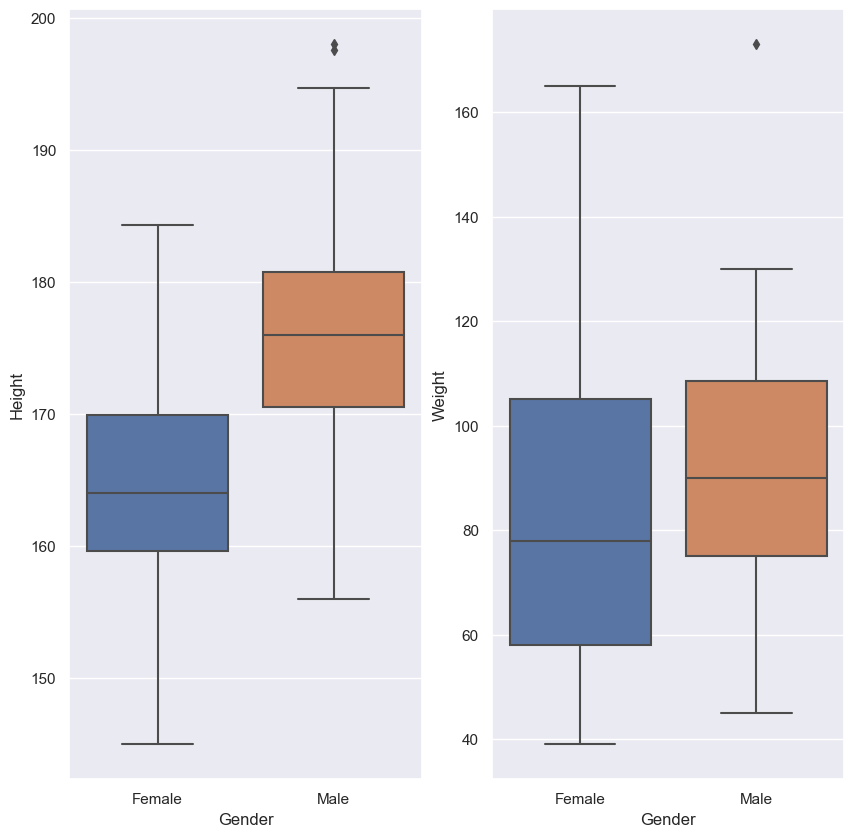

In [21]:
sns.set()
fig = plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Height', data=df)
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Weight', data=df)


Berdasarkan boxplot diatas, laki - laki lebih tinggi daripada perempuan, dalam hal berat badan perempuan memiliki berat yang lebih besar dari laki - laki hal ini terlihat lebih jelas pada persebaran di scatter plot di bawah


<AxesSubplot: xlabel='Height', ylabel='Weight'>

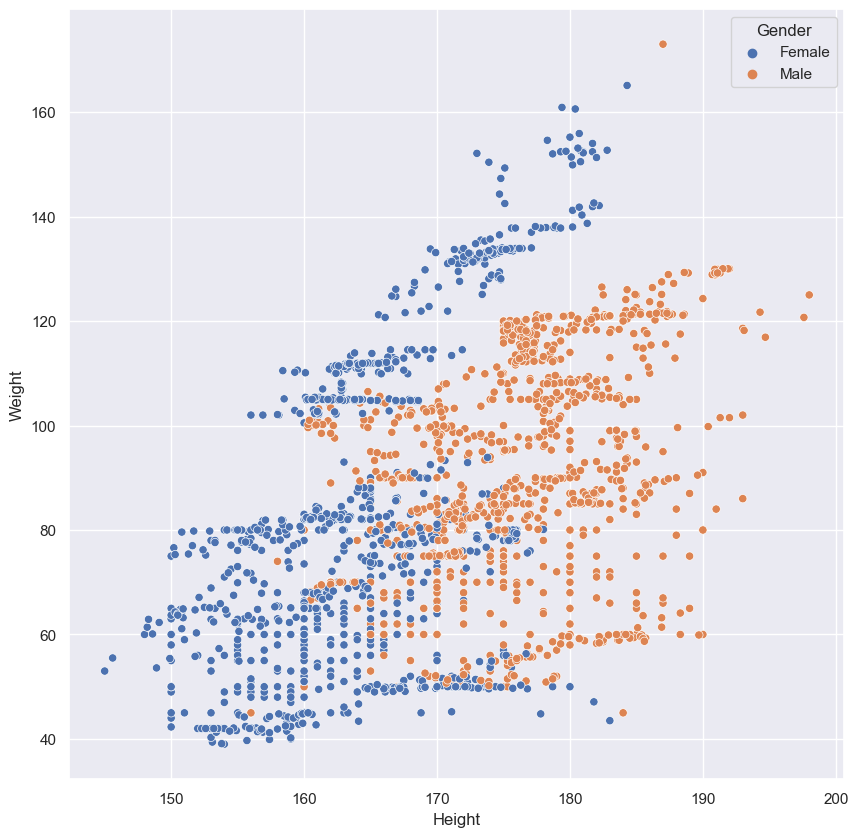

In [22]:
sns.set()
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x="Height", y="Weight", hue="Gender")


### Obesity


In [23]:
counter = Counter(df['Obesity'])
print(counter)


Counter({'Obesity Type I': 351, 'Obesity Type III': 324, 'Obesity Type II': 297, 'Overweight Level I': 290, 'Overweight Level II': 290, 'Normal Weight': 287, 'Insufficient Weight': 272})


In [24]:
# Buat Labelling pie chart
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format


Text(0.5, 1.0, 'Weight Category')

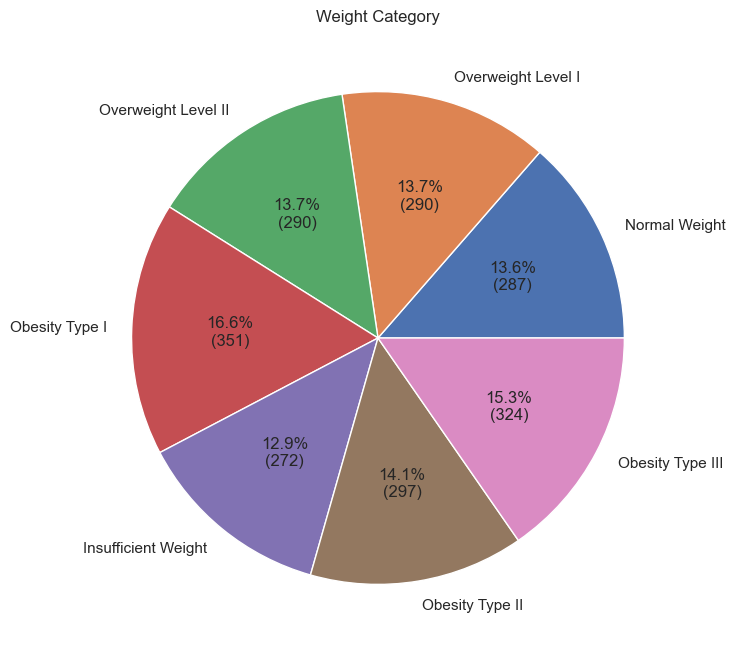

In [25]:
s = df['Obesity'].value_counts()
fig = plt.figure(figsize=(8, 8))
plt.pie([float(counter[v]) for v in counter],
        labels=[str(k) for k in counter], autopct=autopct_format(s))
plt.title('Weight Category')


In [26]:
filter = df['Gender'] == 'Male'
counterMale = Counter(df.loc[filter, 'Obesity'])
counterFemale = Counter(df.loc[~filter, 'Obesity'])


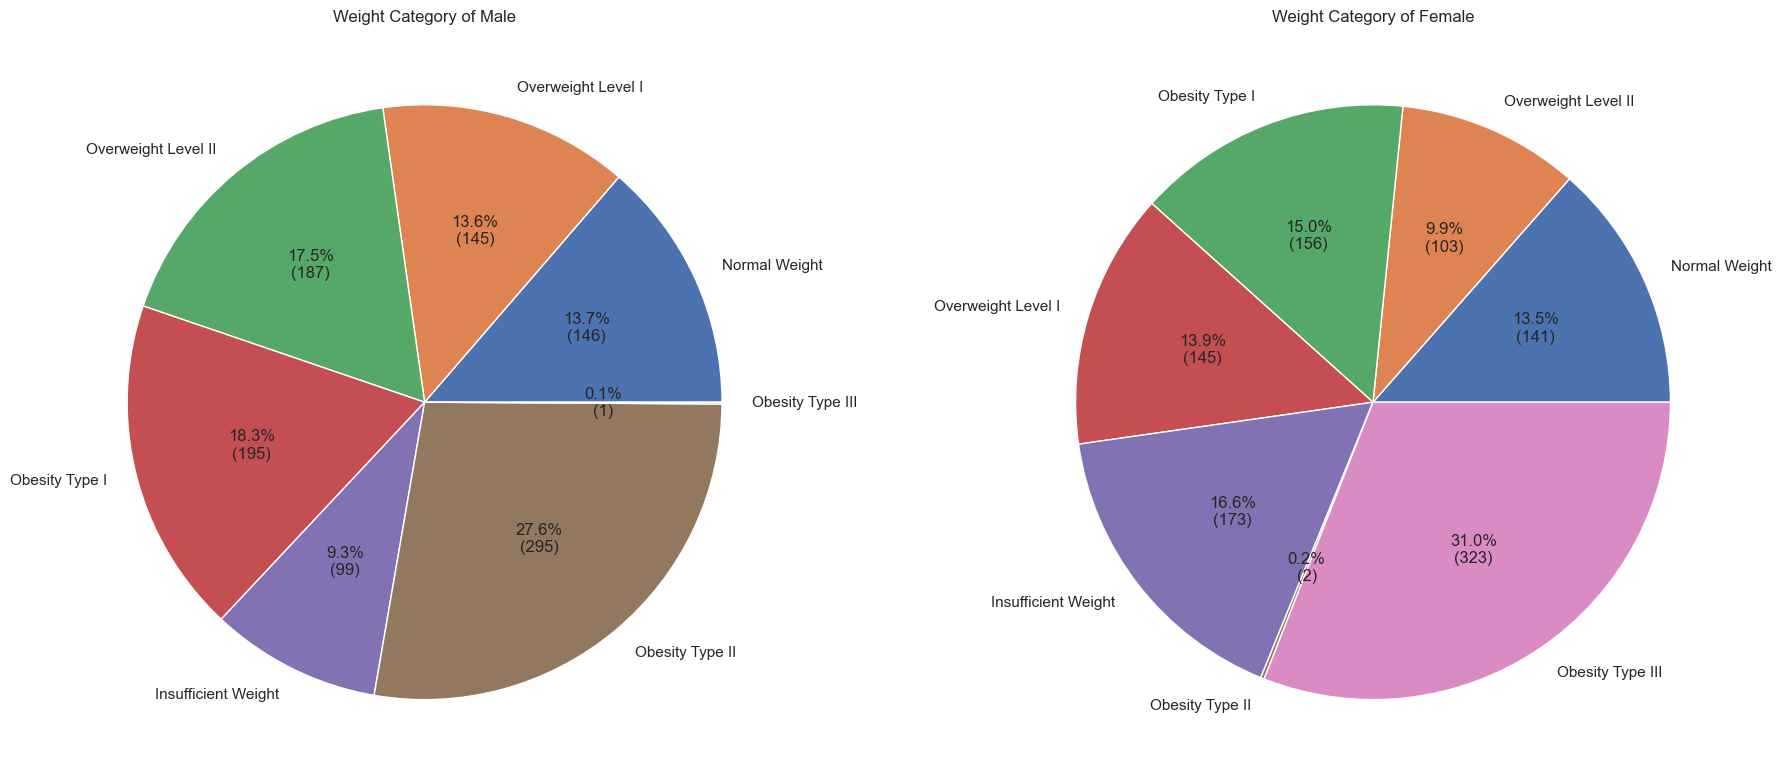

In [27]:
labelMale = df.loc[filter, 'Obesity'].value_counts()
labelFemale = df.loc[~filter, 'Obesity'].value_counts()
fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.pie([float(counterMale[v]) for v in counterMale], labels=[str(k)
        for k in counterMale], autopct=autopct_format(labelMale))
plt.title('Weight Category of Male')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.pie([float(counterFemale[v]) for v in counterFemale], labels=[str(k)
        for k in counterFemale], autopct=autopct_format(labelFemale))
plt.title('Weight Category of Female')
plt.tight_layout()


Pada pie chart diatas terlihat kategori obesitas yang paling tertinggi yaitu obesitas tipe III, perempuan lebih banyak daripada laki - laki. Disisi lain ada hal yang menarik, terlihat bahwa kategori insufficient weight juga perempuan lebih banyak daripada laki-laki, dapat disadari bahwa tekanan untuk melakukan diet lebih besar pada perempuan


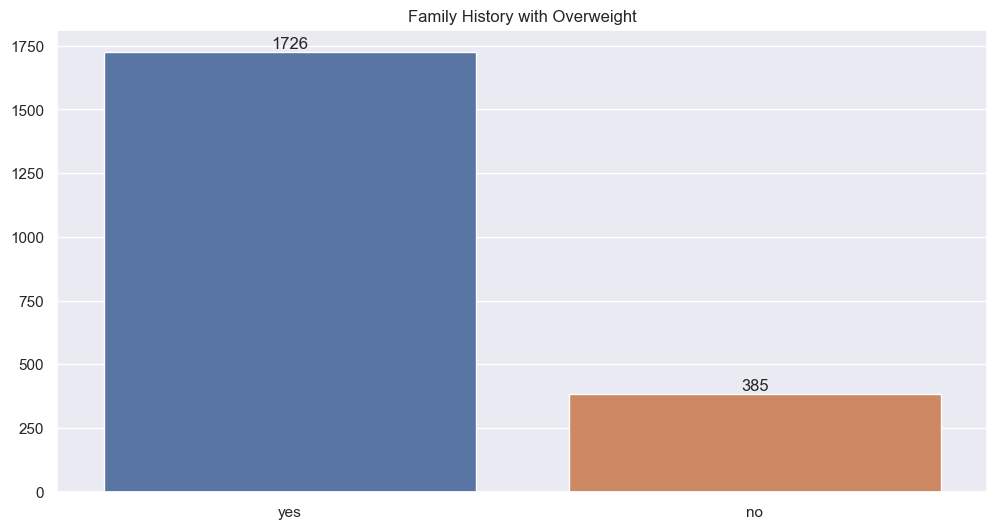

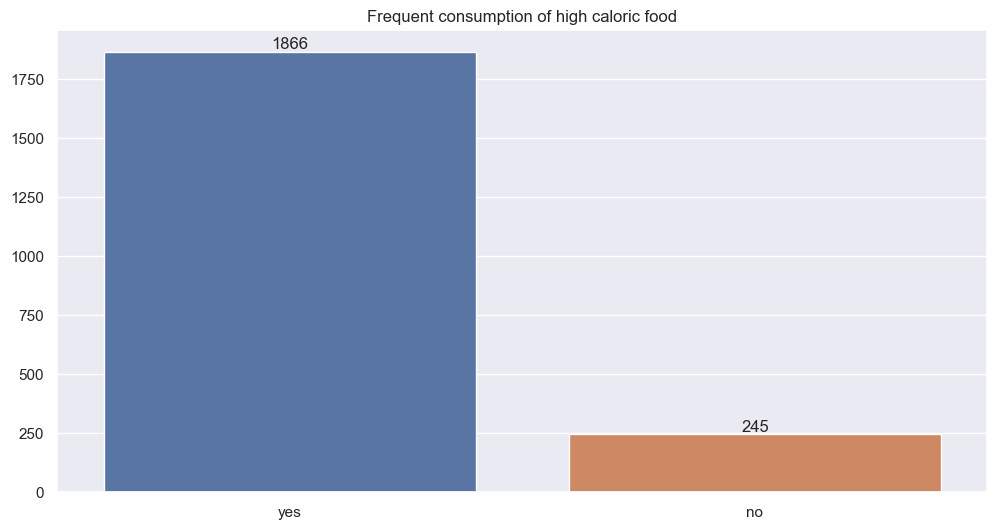

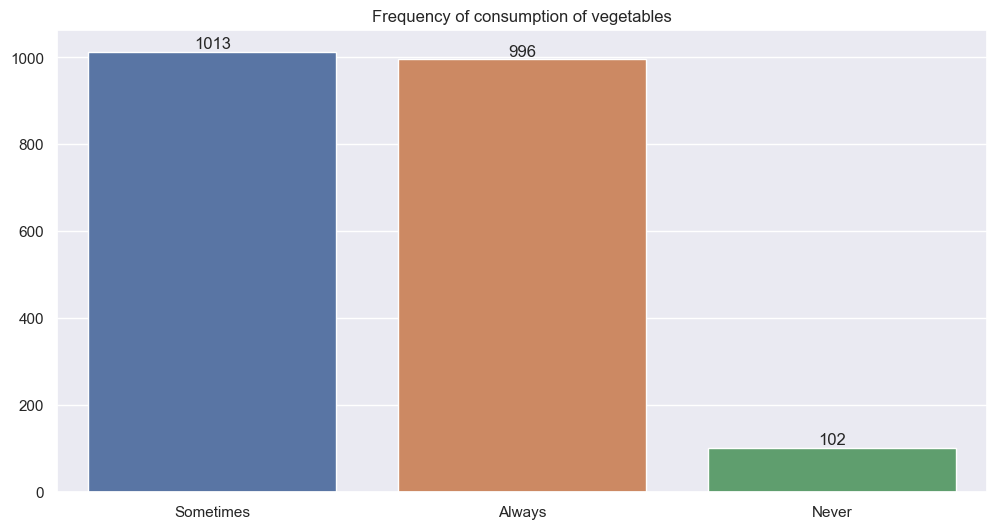

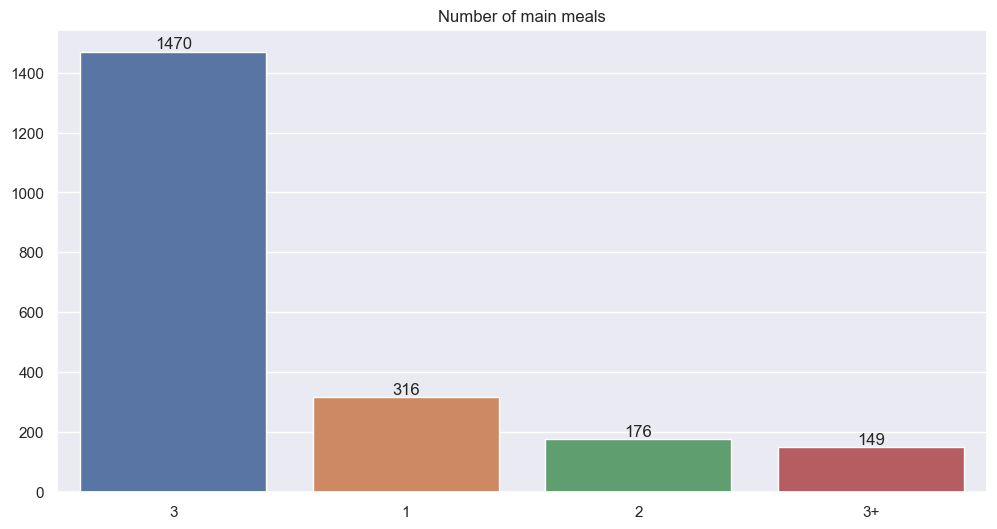

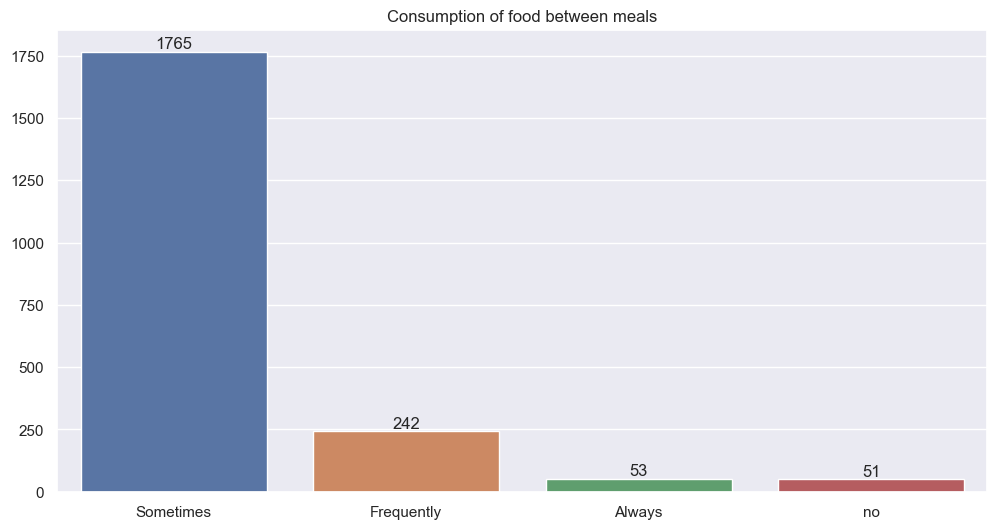

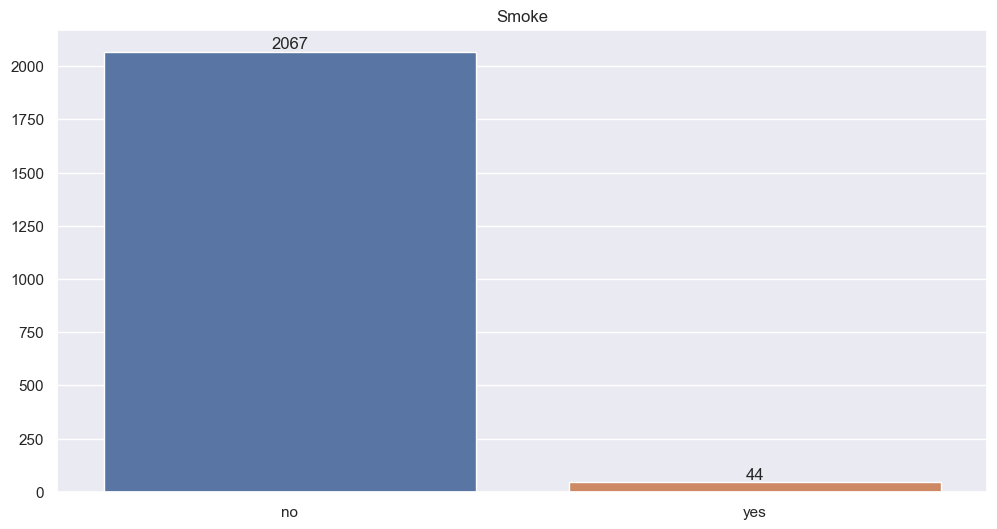

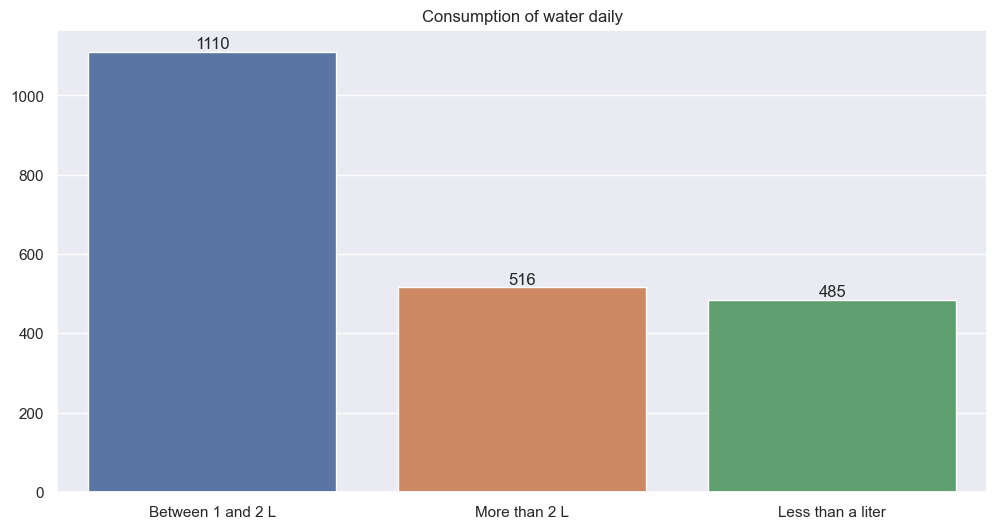

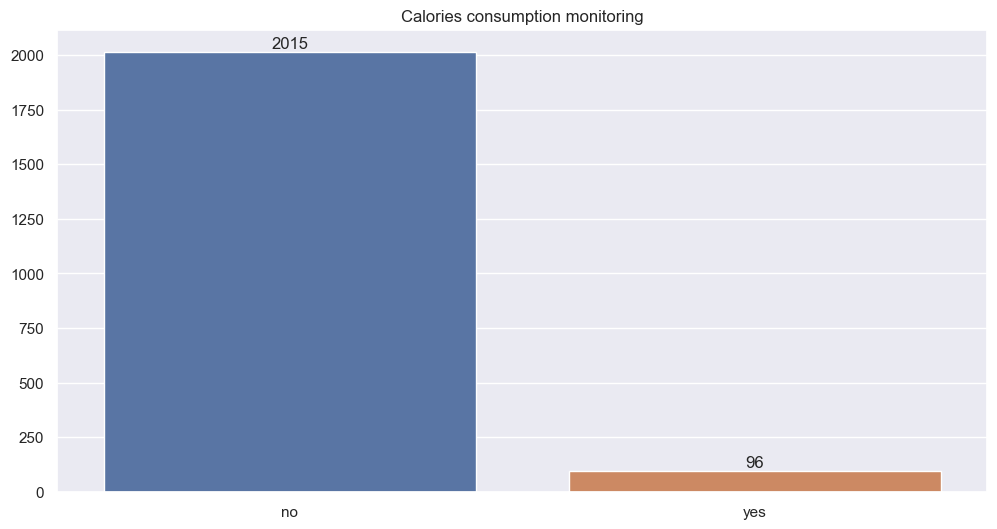

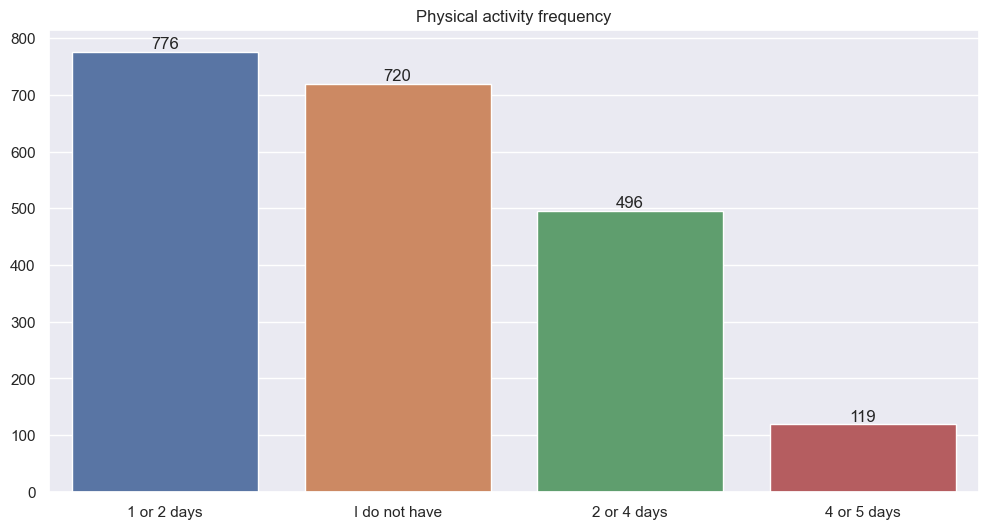

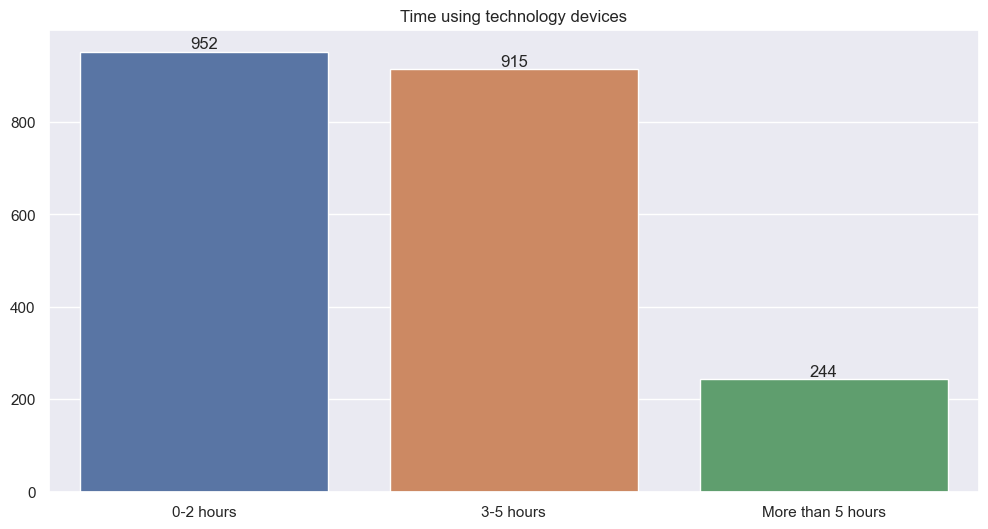

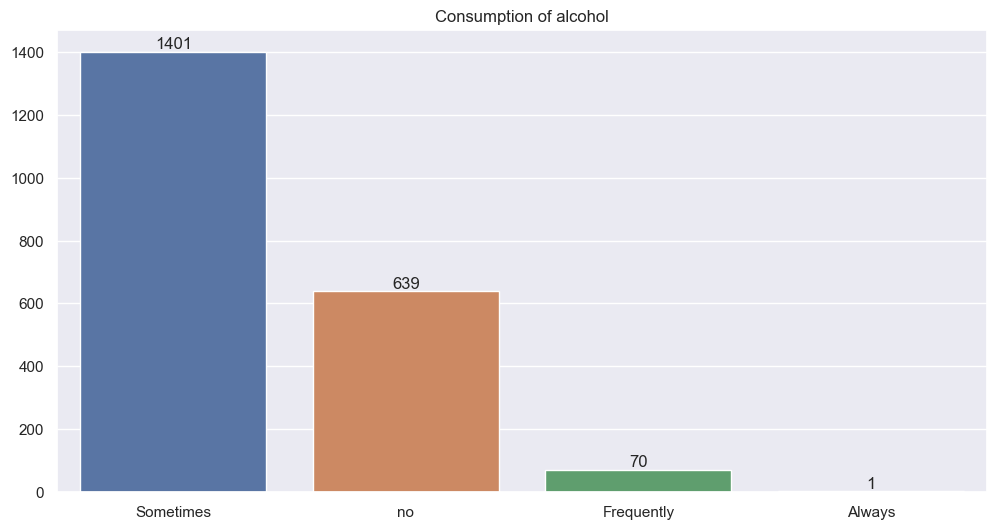

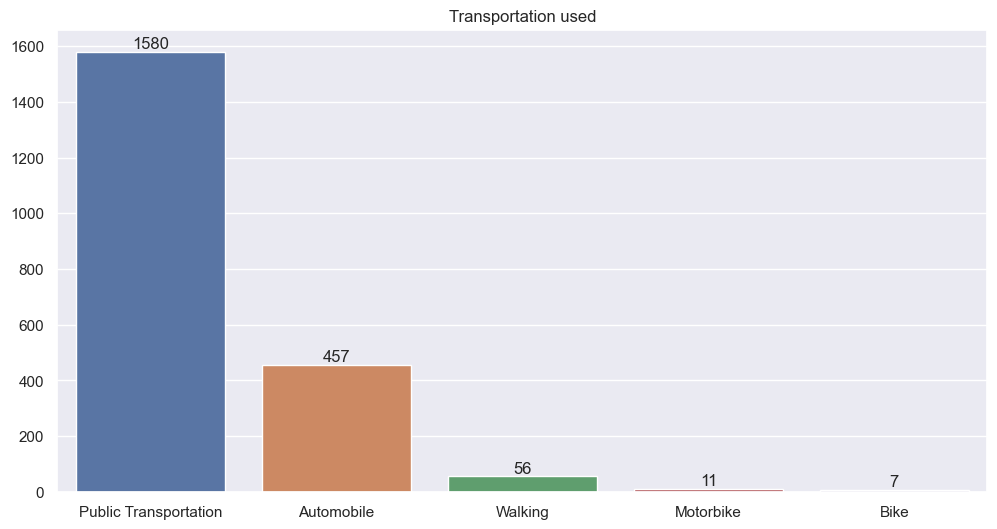

In [28]:
for columns in df.columns[4:-1]:
    data = df[columns].value_counts()
    values = df[columns].value_counts().index.to_list()
    counts = df[columns].value_counts().to_list()

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=values, y=counts)
    plt.title(columns)
    for i in ax.containers:
        ax.bar_label(i,)


## Data Prepocessing


In [29]:
# Classifier tidak dapat beroperasi dengan data label secara langsung
# One Hot Encoder dan Label Encoding akan digunakan untuk menetapkan 
# nilai numerik ke setiap kategori

# cari categorial variables
category = df1.dtypes == object


categorialVariables = category[category].index
print('Categorical variables:', categorialVariables)
print('\n')

false = category[~category]
nonCategorialVariables = false.index
print('Non Categorical variables:', nonCategorialVariables)


Categorical variables: Index(['Gender', 'Family History with Overweight',
       'Frequent consumption of high caloric food',
       'Consumption of food between meals', 'Smoke',
       'Calories consumption monitoring', 'Consumption of alcohol',
       'Transportation used', 'Obesity'],
      dtype='object')


Non Categorical variables: Index(['Age', 'Height', 'Weight', 'Frequency of consumption of vegetables',
       'Number of main meals', 'Consumption of water daily',
       'Physical activity frequency', 'Time using technology devices'],
      dtype='object')


In [30]:
# Categorial variables yang valuenya lebih dari 2 value
column = [x for x in categorialVariables]
multiple = [df1[x].unique() for x in categorialVariables]

multipleColumns = {column: value for column, values in zip(column, multiple) if len(values)>2}
print('Categorical variables with more than 2 values:',
      multipleColumns.keys())


Categorical variables with more than 2 values: dict_keys(['Consumption of food between meals', 'Consumption of alcohol', 'Transportation used', 'Obesity'])


In [31]:
df1.columns


def col_no(x):
    d = {}
    d[df1.columns[x]] = x
    return(d)


print([col_no(x) for x in range(0, len(df1.columns))])


[{'Gender': 0}, {'Age': 1}, {'Height': 2}, {'Weight': 3}, {'Family History with Overweight': 4}, {'Frequent consumption of high caloric food': 5}, {'Frequency of consumption of vegetables': 6}, {'Number of main meals': 7}, {'Consumption of food between meals': 8}, {'Smoke': 9}, {'Consumption of water daily': 10}, {'Calories consumption monitoring': 11}, {'Physical activity frequency': 12}, {'Time using technology devices': 13}, {'Consumption of alcohol': 14}, {'Transportation used': 15}, {'Obesity': 16}]


In [32]:
x = df1[df1.columns[:-1]]
y = df['Obesity']

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, train_size=0.8)


In [33]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))


1688
423
1688
423


- Obesity level yang menjadi target, akan ditransform menjadi label digit dengan **LabelEncoder**
- Untuk values yang ranges tidak konsisten seperti umur, tinggi, dan berat badan menggunakan **StandardScaler** untuk menghindari berat yang tidak proposional
- Feature yang bersifat ordinal (value seperti 'never', 'sometimes', 'always') dipropress dengan **OrdinalEncoder** (sama seperti LabelEncoder, namun ini memerlukan banyak argumen karena yang terakhir dimaksudkan untuk nilai y saja)

- Feature yang tidak bersifat non-ordinal dipreproses dengan **OneHotEncoder**

- SimpleImputer digunakan di semua atribut untuk menangani missing values

- Semua preproses akan dibundling di pipeline


In [34]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train


array([5, 4, 4, ..., 6, 1, 1])

In [35]:
Scale_features = ['Age', 'Height', 'Weight']
Scale_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('Scaling', StandardScaler())
])

Ordi_features = ['Consumption of food between meals', 'Consumption of alcohol']
Ordi_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('Ordi', OrdinalEncoder())
])

NonO_features = ['Gender', 'Family History with Overweight', 'Frequent consumption of high caloric food',
                 'Smoke', 'Calories consumption monitoring', 'Transportation used']
NonO_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('Non-O', OneHotEncoder())
])

Preprocessor = ColumnTransformer(transformers=[
    ('Ordinal', Ordi_transformer, Ordi_features),
    ('Non-Ordinal', NonO_transformer, NonO_features)
], remainder='passthrough')
# isi remainder = ['Frequency of consumption of vegetables', 'Number of main meals', 'Consumption of water daily', 'Physical activity frequency', 'Time using technology devices']

clf = Pipeline(steps=[('preprocessor', Preprocessor)])

In [36]:
clf.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('Ordi',
                                                                   OrdinalEncoder())]),
                                                  ['Consumption of food '
                                                   'between meals',
                                                   'Consumption of alcohol']),
                                                 ('Non-Ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('Non-O',
                                                                   OneHotEncoder())]),
                                                  ['Gender',
                                                   'Family History with '
                                                   'Overweight',
                                                   'Frequent consumption of '
                                                   'high caloric food',
                                                   'Smoke',
                                                   'Calories consumption '
                                                   'monitoring',
                                                   'Transportation used'])]))])

In [37]:
transform_df = clf.fit_transform(x_train)
print(transform_df.shape)

(1688, 25)


In [38]:
# Kolom yang masuk yang di passthrough atau kolom yang tidak dipreproses
nonCategorialVariables

Index(['Age', 'Height', 'Weight', 'Frequency of consumption of vegetables',
       'Number of main meals', 'Consumption of water daily',
       'Physical activity frequency', 'Time using technology devices'],
      dtype='object')

In [39]:
feature_names = ['Consumption of food between meals',
                 'Consumption of alcohol', 
                 'Gender_Female',
                 'Gender_Male',
                 'Family History with Overweight_no',
                 'Family History with Overweight_yes',
                 'Frequent consumption of high caloric food_no',
                 'Frequent consumption of high caloric food_yes',
                 'Smoke_no',
                 'Smoke_yes',
                 'Calories consumption monitoring_no',
                 'Calories consumption monitoring_yes',
                 'Transportation used_Automobile',
                 'Transportation used_Bike',
                 'Transportation used_Motorbike',
                 'Transportation used_Public Transportation',
                 'Transportation used_Walking',
                 'Age',
                 'Height',
                 'Weight',
                 'Frequency of consumption of vegetables',
                 'Number of main meals',
                 'Consumption of water daily',
                 'Physical activity frequency',
                 'Time using technology devices']


In [40]:
# Menggabungkan semua kolom yang sudah di preproses
transformed_x_train = pd.DataFrame(transform_df, columns=feature_names)

In [41]:
transformed_x_train

,Consumption of food between meals,Consumption of alcohol,Gender_Female,Gender_Male,Family History with Overweight_no,Family History with Overweight_yes,Frequent consumption of high caloric food_no,Frequent consumption of high caloric food_yes,Smoke_no,Smoke_yes,...,Transportation used_Public Transportation,Transportation used_Walking,Age,Height,Weight,Frequency of consumption of vegetables,Number of main meals,Consumption of water daily,Physical activity frequency,Time using technology devices
0,2.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,18.9,175.5,80.0,2.0,1.0,2.0,3.0,1.0
1,2.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,21.0,171.1,131.4,3.0,3.0,2.0,2.0,1.0
2,2.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,25.8,162.8,108.1,3.0,3.0,2.0,0.0,0.0
3,2.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,18.2,165.0,82.3,3.0,3.0,2.0,1.0,0.0
4,2.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,18.0,174.0,70.0,2.0,3.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,2.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,21.0,165.0,88.1,2.0,1.0,3.0,1.0,1.0
1684,2.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,33.7,168.0,74.9,3.0,1.0,1.0,0.0,0.0
1685,2.0,3.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,22.6,168.5,81.0,2.0,3.0,2.0,0.0,2.0
1686,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,61.0,165.0,66.0,3.0,3.0,2.0,1.0,1.0


In [42]:
le = LabelEncoder()
y_test = le.fit_transform(y_test)
le_name_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print(le_name_mapping)


{0: 'Insufficient Weight', 1: 'Normal Weight', 2: 'Obesity Type I', 3: 'Obesity Type II', 4: 'Obesity Type III', 5: 'Overweight Level I', 6: 'Overweight Level II'}


# Modelling

In [43]:
from sklearn.ensemble import RandomForestClassifier
classifiers = tree.DecisionTreeClassifier()


![Criterion Formula](ginientropylogloss.jpg)


In [44]:
pipe = Pipeline(steps=[('preprocessor', Preprocessor),
                       ('classifier', classifiers)])
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('Ordi',
                                                                   OrdinalEncoder())]),
                                                  ['Consumption of food '
                                                   'between meals',
                                                   'Consumption of alcohol']),
                                                 ('Non-Ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('Non-O',
                                                                   OneHotEncoder())]),
                                                  ['Gender',
                                                   'Family History with '
                                                   'Overweight',
                                                   'Frequent consumption of '
                                                   'high caloric food',
                                                   'Smoke',
                                                   'Calories consumption '
                                                   'monitoring',
                                                   'Transportation used'])])),
                ('classifier', DecisionTreeClassifier())])

In [45]:
# training model
pipe.fit(x_train, y_train)
print(classifiers)

acc_score = pipe.score(x_test, y_test)
print("Akurasi : %.4f" % acc_score)

# using the model to predict
y_pred = pipe.predict(x_test)

target_names = [le_name_mapping[x] for x in le_name_mapping]
print(classification_report(y_test, y_pred, target_names=target_names))


DecisionTreeClassifier()
Akurasi : 0.9409
                     precision    recall  f1-score   support

Insufficient Weight       0.96      0.94      0.95        50
      Normal Weight       0.90      0.84      0.87        56
     Obesity Type I       0.96      0.96      0.96        71
    Obesity Type II       0.98      1.00      0.99        54
   Obesity Type III       1.00      1.00      1.00        73
 Overweight Level I       0.85      0.95      0.90        63
Overweight Level II       0.94      0.88      0.91        56

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423



[Text(0, 0.5, 'Insufficient Weight'),
 Text(0, 1.5, 'Normal Weight'),
 Text(0, 2.5, 'Obesity Type I'),
 Text(0, 3.5, 'Obesity Type II'),
 Text(0, 4.5, 'Obesity Type III'),
 Text(0, 5.5, 'Overweight Level I'),
 Text(0, 6.5, 'Overweight Level II')]

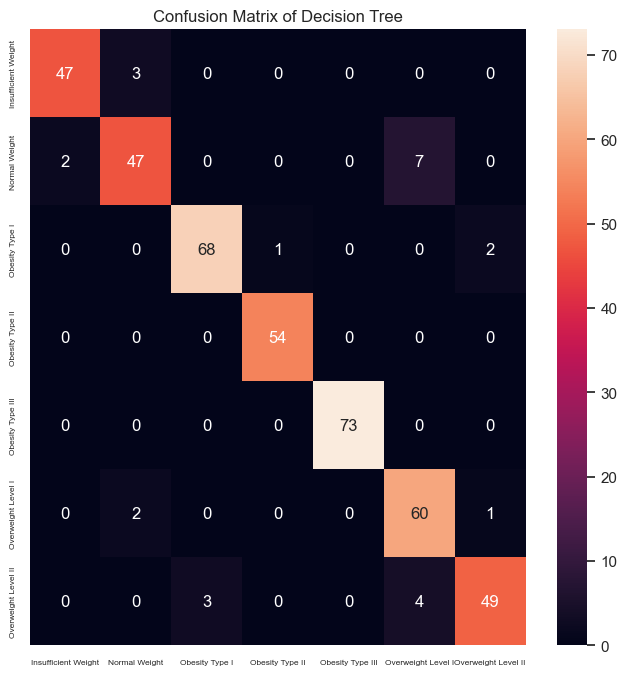

In [46]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8, 8))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g')
ax.set_title('Confusion Matrix of Decision Tree')
ax.xaxis.set_ticklabels(
    ['Insufficient Weight', 'Normal Weight', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III', 'Overweight Level I', 'Overweight Level II'], fontsize = 6)
ax.yaxis.set_ticklabels(['Insufficient Weight', 'Normal Weight', 'Obesity Type I',
                        'Obesity Type II', 'Obesity Type III', 'Overweight Level I', 'Overweight Level II'], fontsize=6)



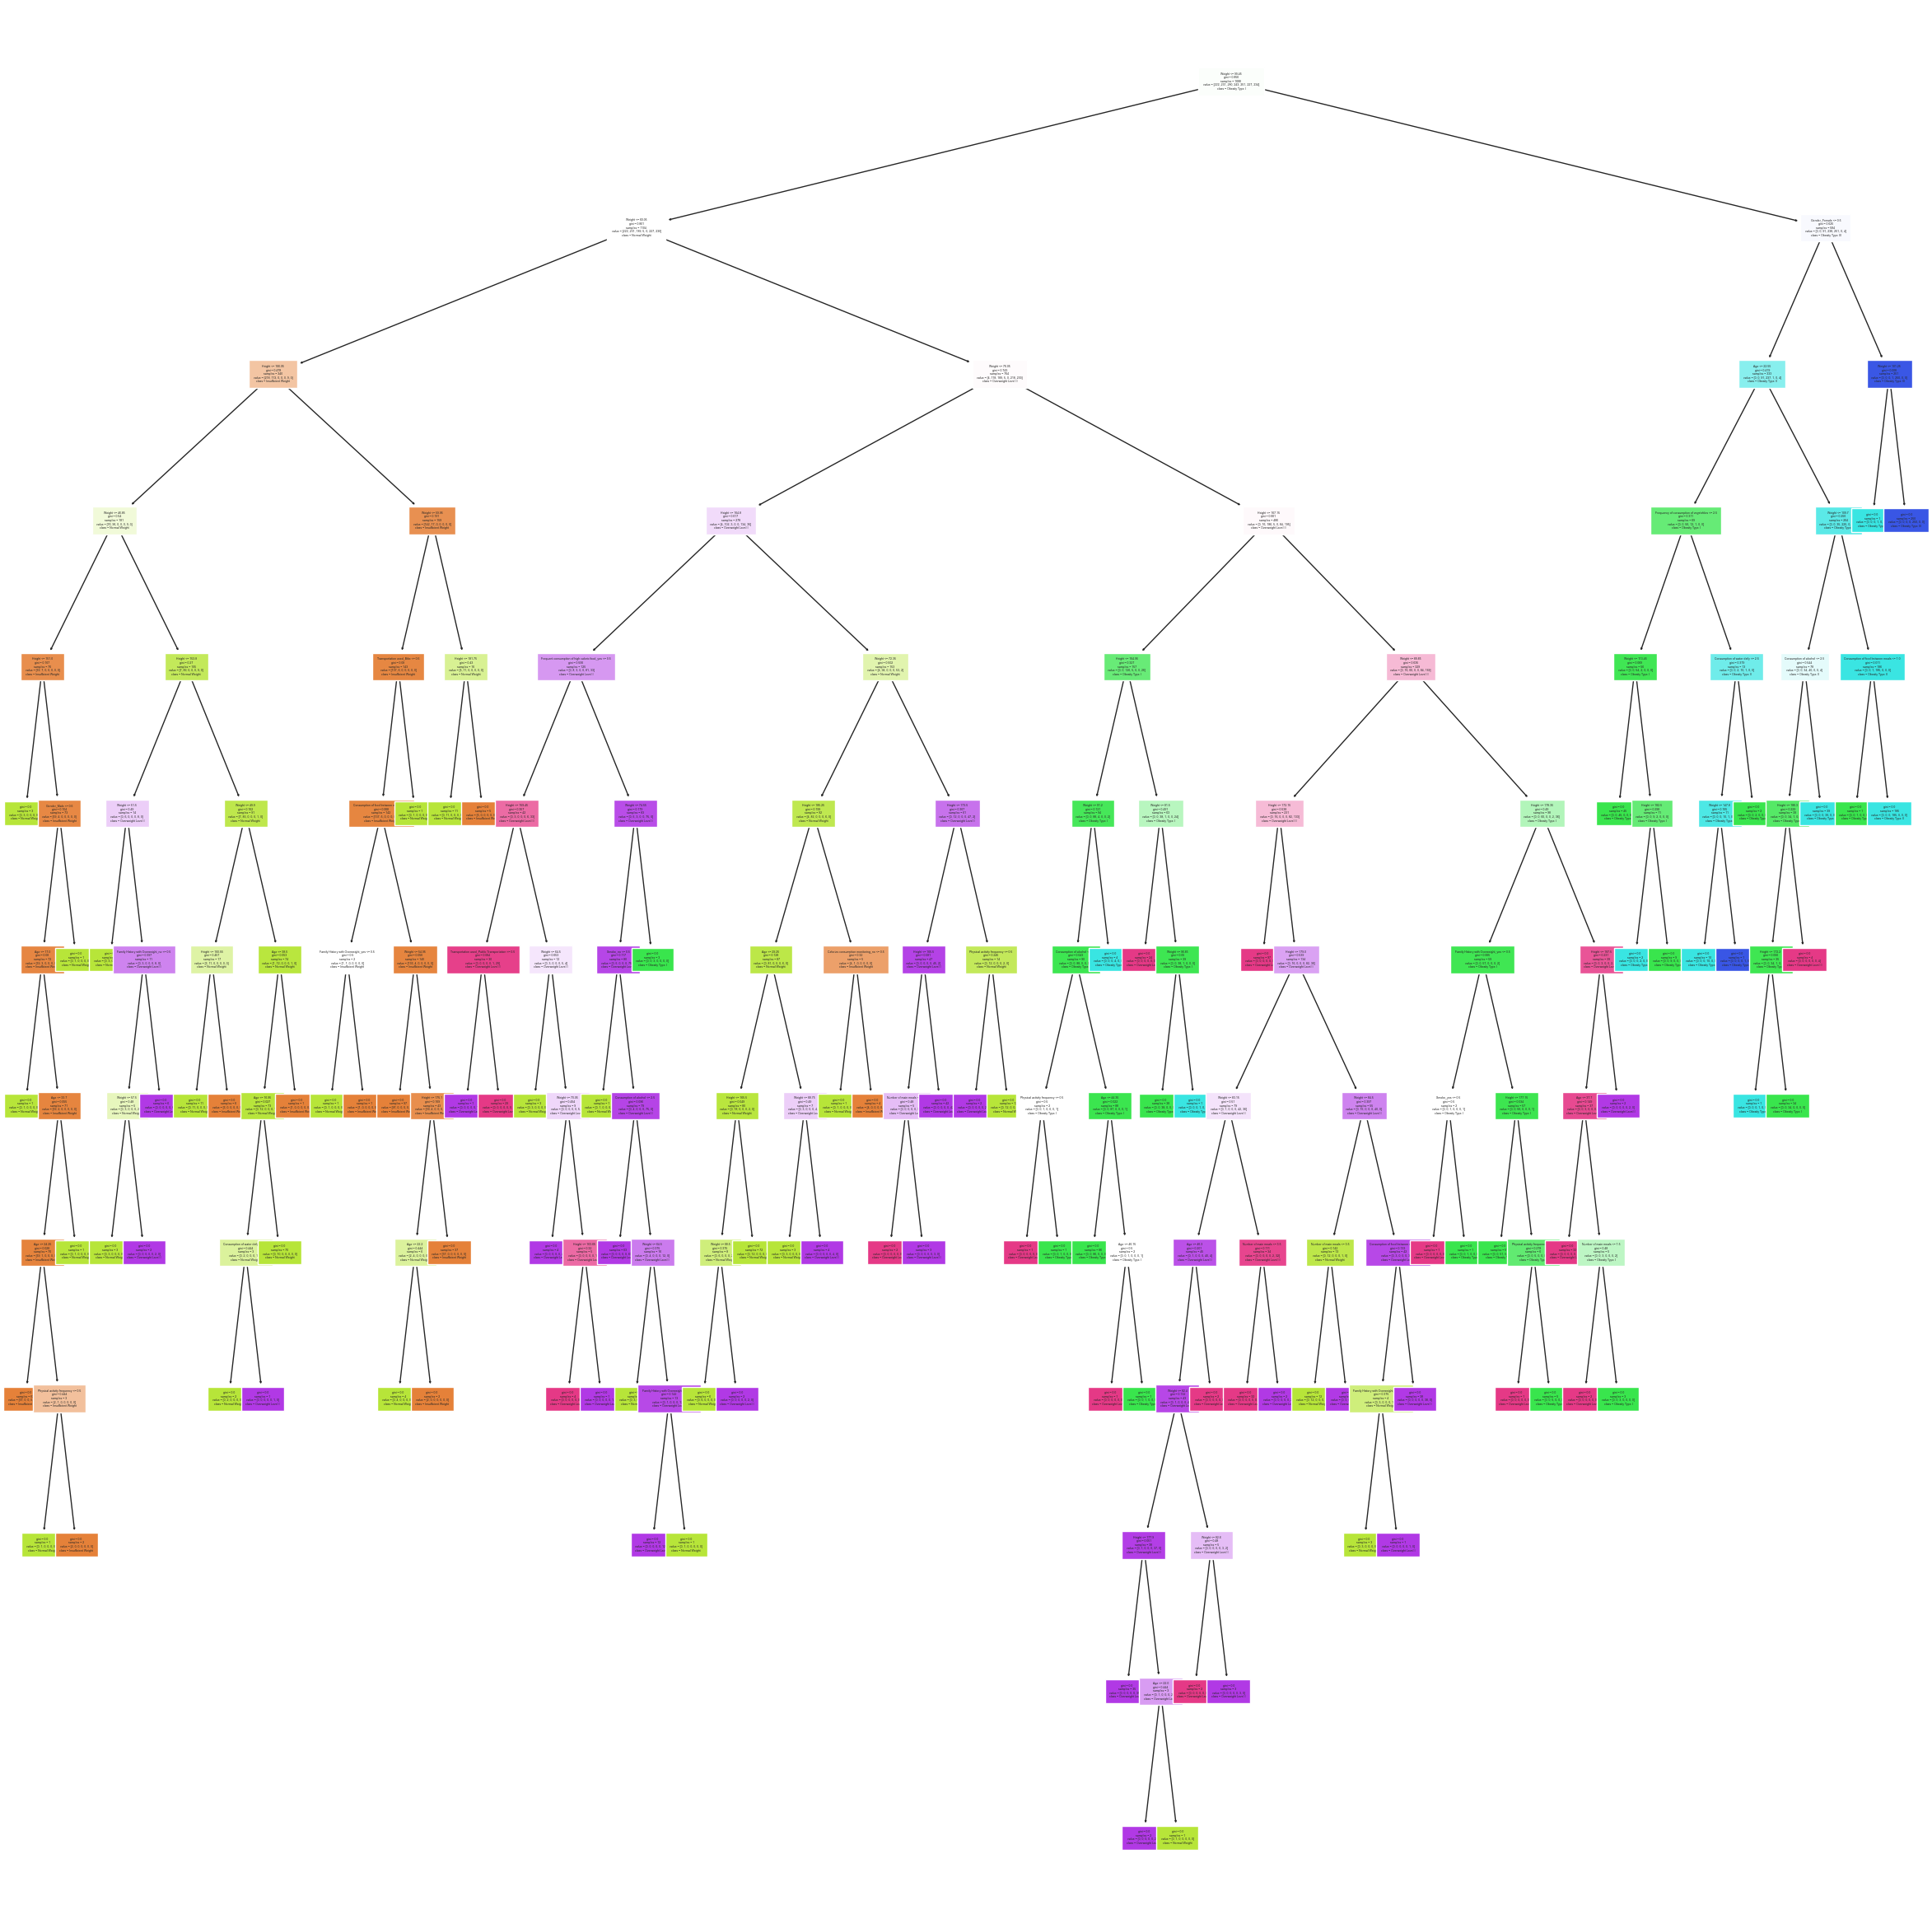

In [47]:
plt.figure(figsize=(30, 30))
tree.plot_tree(classifiers, filled=True, fontsize=2.5,
               feature_names=feature_names, class_names=target_names)
plt.savefig('PohonObesitas.png', dpi=400)
plt.show()


In [48]:
input_data = (2,3,0,1,0,1,0,1,1,0,1,0,0,0,0,0,1,14,171,72,3,3,3,2,1)
input_array = np.asarray(input_data)
re = input_array.reshape(1, -1)
input_array.shape

prediction = classifiers.predict(re)
classifiers
print(prediction)



[1]


In [49]:
pickle.dump(classifiers,open('model.sav','wb'))